In [32]:
import os
import pandas as pd
import nibabel as nib
import numpy as np
from sklearn.model_selection import train_test_split
path="/Users/ciro/Documents/Brain Tumor Datasets"

# Load the name mapping file
name_mapping = pd.read_csv(path+'/2020/name_mapping.csv')
print(name_mapping.head())


  Grade BraTS_2017_subject_ID BraTS_2018_subject_ID TCGA_TCIA_subject_ID  \
0   HGG   Brats17_CBICA_AAB_1   Brats18_CBICA_AAB_1                  NaN   
1   HGG   Brats17_CBICA_AAG_1   Brats18_CBICA_AAG_1                  NaN   
2   HGG   Brats17_CBICA_AAL_1   Brats18_CBICA_AAL_1                  NaN   
3   HGG   Brats17_CBICA_AAP_1   Brats18_CBICA_AAP_1                  NaN   
4   HGG   Brats17_CBICA_ABB_1   Brats18_CBICA_ABB_1                  NaN   

  BraTS_2019_subject_ID BraTS_2020_subject_ID  
0   BraTS19_CBICA_AAB_1  BraTS20_Training_001  
1   BraTS19_CBICA_AAG_1  BraTS20_Training_002  
2   BraTS19_CBICA_AAL_1  BraTS20_Training_003  
3   BraTS19_CBICA_AAP_1  BraTS20_Training_004  
4   BraTS19_CBICA_ABB_1  BraTS20_Training_005  


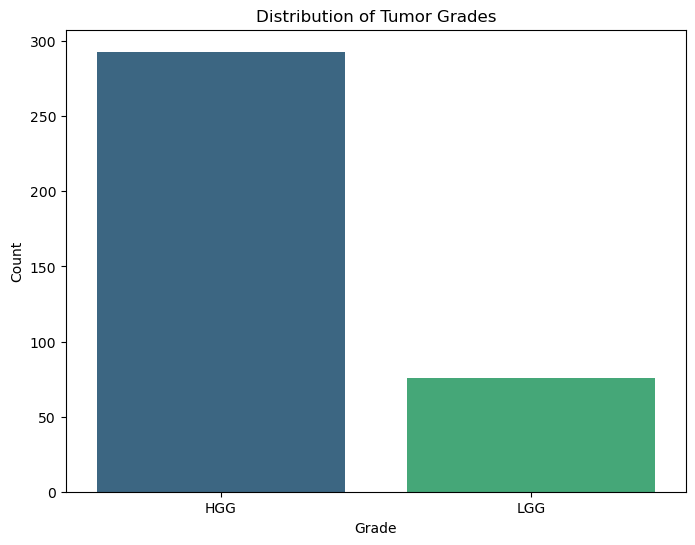

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the number of HGG and LGG cases
grade_counts = name_mapping['Grade'].value_counts()

# Plot the distribution of tumor grades
plt.figure(figsize=(8, 6))
sns.barplot(x=grade_counts.index, y=grade_counts.values, palette='viridis')
plt.title('Distribution of Tumor Grades')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.show()


In [34]:
 
def sitk_show(img, title=None, margin=0.0, dpi=40):
    nda = SimpleITK.GetArrayFromImage(img)
#     nda=numpy.transpose(nda)
#     print(nda.shape)
    #spacing = img.GetSpacing()
    figsize = (1 + margin) * nda.shape[0] / dpi, (1 + margin) * nda.shape[1] / dpi
    #extent = (0, nda.shape[1]*spacing[1], nda.shape[0]*spacing[0], 0)
    extent = (0, nda.shape[1], nda.shape[0], 0)
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_axes([margin, margin, 1 - 2*margin, 1 - 2*margin])

    plt.set_cmap("gray")
    ax.imshow(nda,extent=extent,interpolation=None)
    
    if title:
        plt.title(title)
    
    plt.show()

In [37]:
path="/Users/ciro/Downloads/MICCAI_BraTS_2019_Data_Training"





filenameF = f"{path}/HGG/BraTS19_2013_2_1/BraTS19_2013_2_1_flair.nii"
filenameT1 = f"{path}/HGG/BraTS19_2013_2_1/BraTS19_2013_2_1_t1.nii"
filenameT2=f"{path}/HGG/BraTS19_2013_2_1/BraTS19_2013_2_1_t2.nii"
filenameTC=f"{path}/HGG/BraTS19_2013_2_1/BraTS19_2013_2_1_t1ce.nii"
# Slice index to visualize with 'sitk_show'
label=f"{path}/HGG/BraTS19_2013_2_1/BraTS19_2013_2_1_seg.nii"



filenameLF=f"{path}/LGG/BraTS19_TCIA10_420_1/BraTS19_TCIA10_420_1_flair.nii"
filenameLT1=f"{path}/LGG/BraTS19_TCIA10_420_1/BraTS19_TCIA10_420_1_t1.nii"
filenameLT2=f"{path}/LGG/BraTS19_TCIA10_420_1/BraTS19_TCIA10_420_1_t2.nii"
filenameLTC=f"{path}/LGG/BraTS19_TCIA10_420_1/BraTS19_TCIA10_420_1_t1ce.nii"

labelL=f"{path}/LGG/BraTS19_TCIA10_420_1/BraTS19_TCIA10_420_1_seg.nii"
# idxSlice = 100
idxSlice = 105


# int label to assign to the segmented gray matter
labelGrayMatter = 1

In [38]:
import SimpleITK
imgFOriginal = SimpleITK.ReadImage(filenameF)
imgT1Original = SimpleITK.ReadImage(filenameT1)
imgT2Original = SimpleITK.ReadImage(filenameT2)
imgTCOriginal = SimpleITK.ReadImage(filenameTC)
labelOrignal=SimpleITK.ReadImage(label)
# print(labelOrignal)
imgLFOriginal = SimpleITK.ReadImage(filenameLF)
imgLT1Original = SimpleITK.ReadImage(filenameLT1)
imgLT2Original = SimpleITK.ReadImage(filenameLT2)
imgLTCOriginal = SimpleITK.ReadImage(filenameLTC)
labelLOrignal=SimpleITK.ReadImage(labelL)

HGG


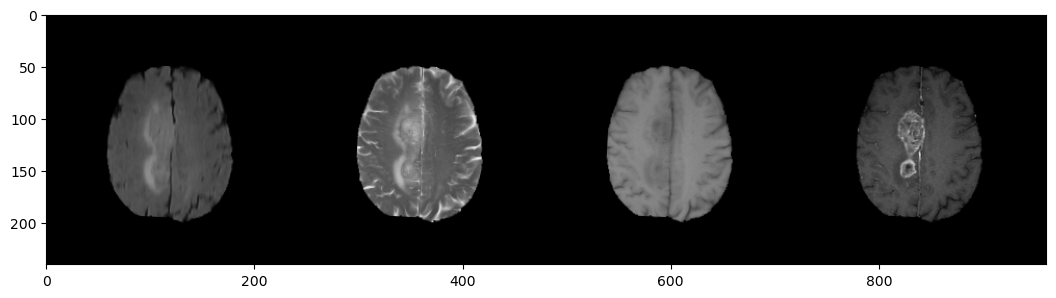

Label


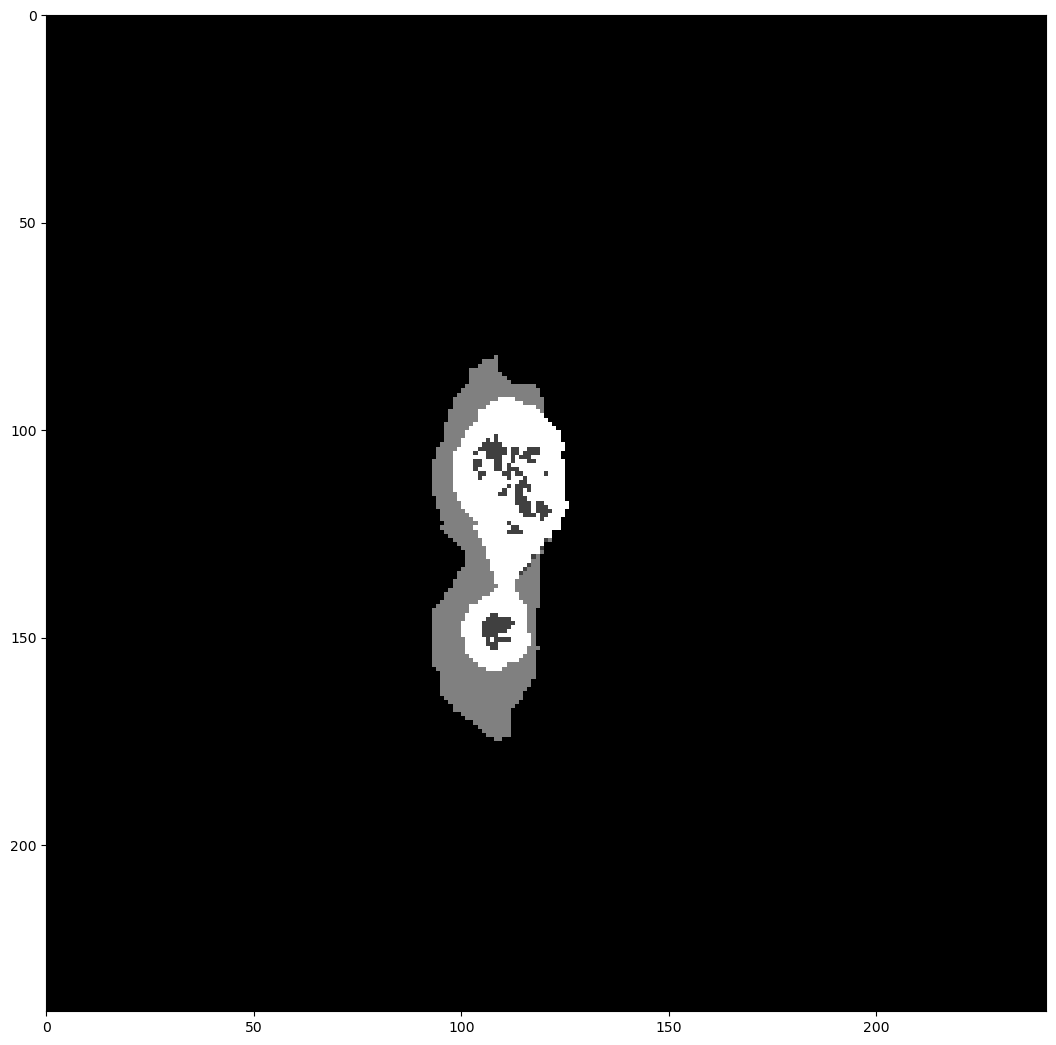

In [40]:
print("HGG")
sitk_show(SimpleITK.Tile(imgFOriginal[:, :, 105],
                         imgT2Original[:, :, 105],
                         imgT1Original[:, :, 105],
                         imgTCOriginal[:, :, 105],
                         (5, 1, 0)))

print("Label")
sitk_show(SimpleITK.Tile(labelOrignal[:,:,105],(2,1,0)))

LGG


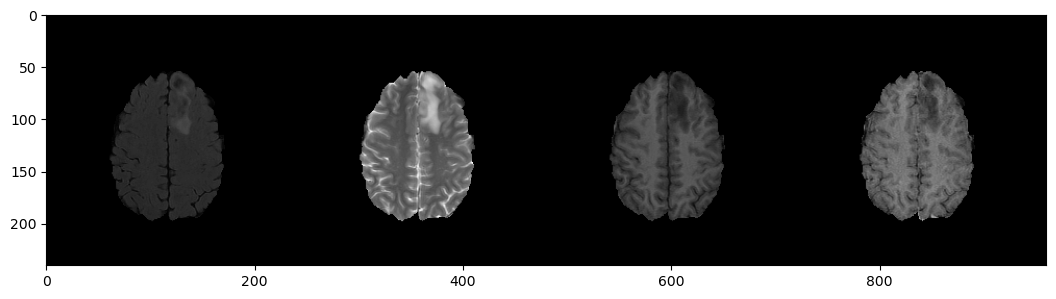

Label


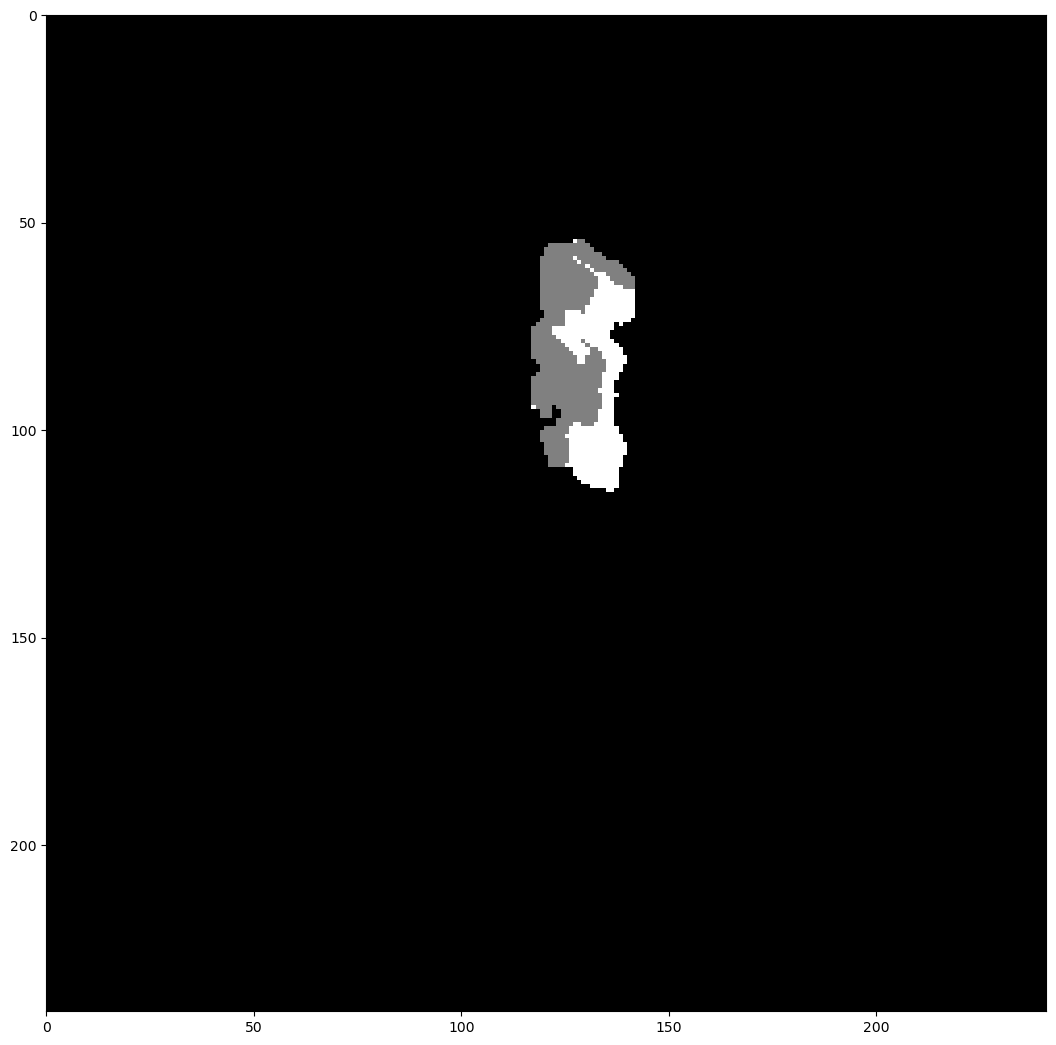

In [41]:
print("LGG")
sitk_show(SimpleITK.Tile(imgLFOriginal[:, :, idxSlice],
                         imgLT2Original[:, :, idxSlice],
                         imgLT1Original[:, :, idxSlice],
                         imgLTCOriginal[:, :, idxSlice],
                         (4, 1, 0)))

print("Label")
sitk_show(SimpleITK.Tile(labelLOrignal[:,:,105],(2,1,0)))

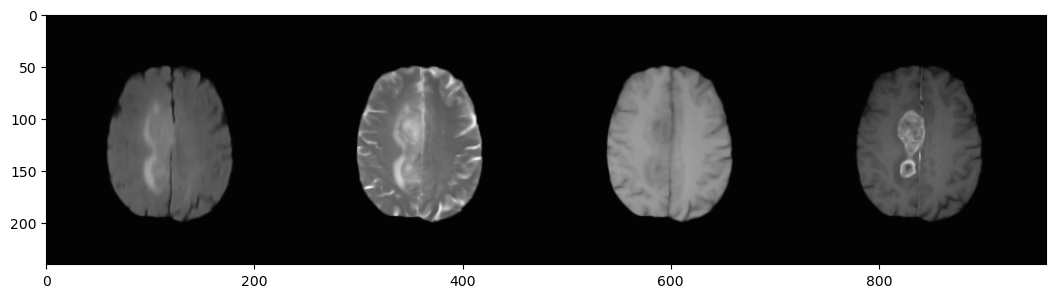

In [42]:
imgFSmooth = SimpleITK.CurvatureFlow(image1=imgFOriginal,
                                      timeStep=0.125,
                                      numberOfIterations=5)

imgT2Smooth = SimpleITK.CurvatureFlow(image1=imgT2Original,
                                      timeStep=0.125,
                                      numberOfIterations=5)
imgT1Smooth = SimpleITK.CurvatureFlow(image1=imgT1Original,
                                      timeStep=0.125,
                                      numberOfIterations=5)

imgTCSmooth = SimpleITK.CurvatureFlow(image1=imgTCOriginal,
                                      timeStep=0.125,
                                      numberOfIterations=5)
# imgLSmooth=SimpleITK.CurvatureFlow(image1=labelOrignal,
#                                       timeStep=0.125,
#                                       numberOfIterations=5)
sitk_show(SimpleITK.Tile(imgFSmooth[:, :, 105], 
                         imgT2Smooth[:, :, 105], 
                         imgT1Smooth[:, :, 105], 
                         imgTCSmooth[:, :, 105],
                         (5, 1, 0)))

LGG


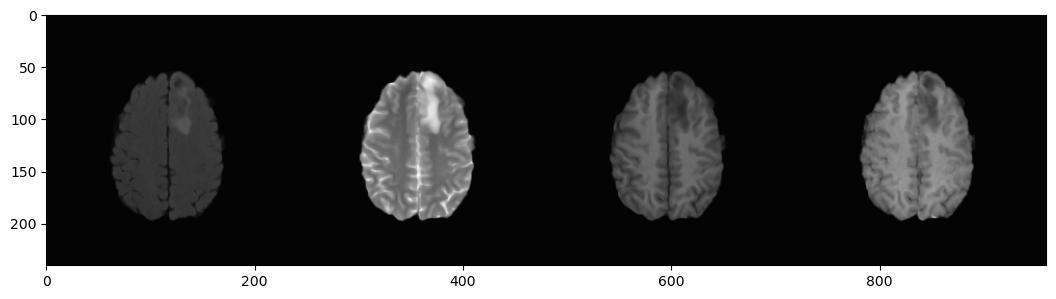

In [43]:
print("LGG")
imgLFSmooth = SimpleITK.CurvatureFlow(image1=imgLFOriginal,
                                      timeStep=0.125,
                                      numberOfIterations=5)

imgLT2Smooth = SimpleITK.CurvatureFlow(image1=imgLT2Original,
                                      timeStep=0.125,
                                      numberOfIterations=5)
imgLT1Smooth = SimpleITK.CurvatureFlow(image1=imgLT1Original,
                                      timeStep=0.125,
                                      numberOfIterations=5)

imgLTCSmooth = SimpleITK.CurvatureFlow(image1=imgLTCOriginal,
                                      timeStep=0.125,
                                      numberOfIterations=5)
sitk_show(SimpleITK.Tile(imgLFSmooth[:, :, idxSlice], 
                         imgLT2Smooth[:, :, idxSlice], 
                         imgLT1Smooth[:, :, idxSlice], 
                         imgLTCSmooth[:, :, idxSlice], 
                         (4, 1, 0)))

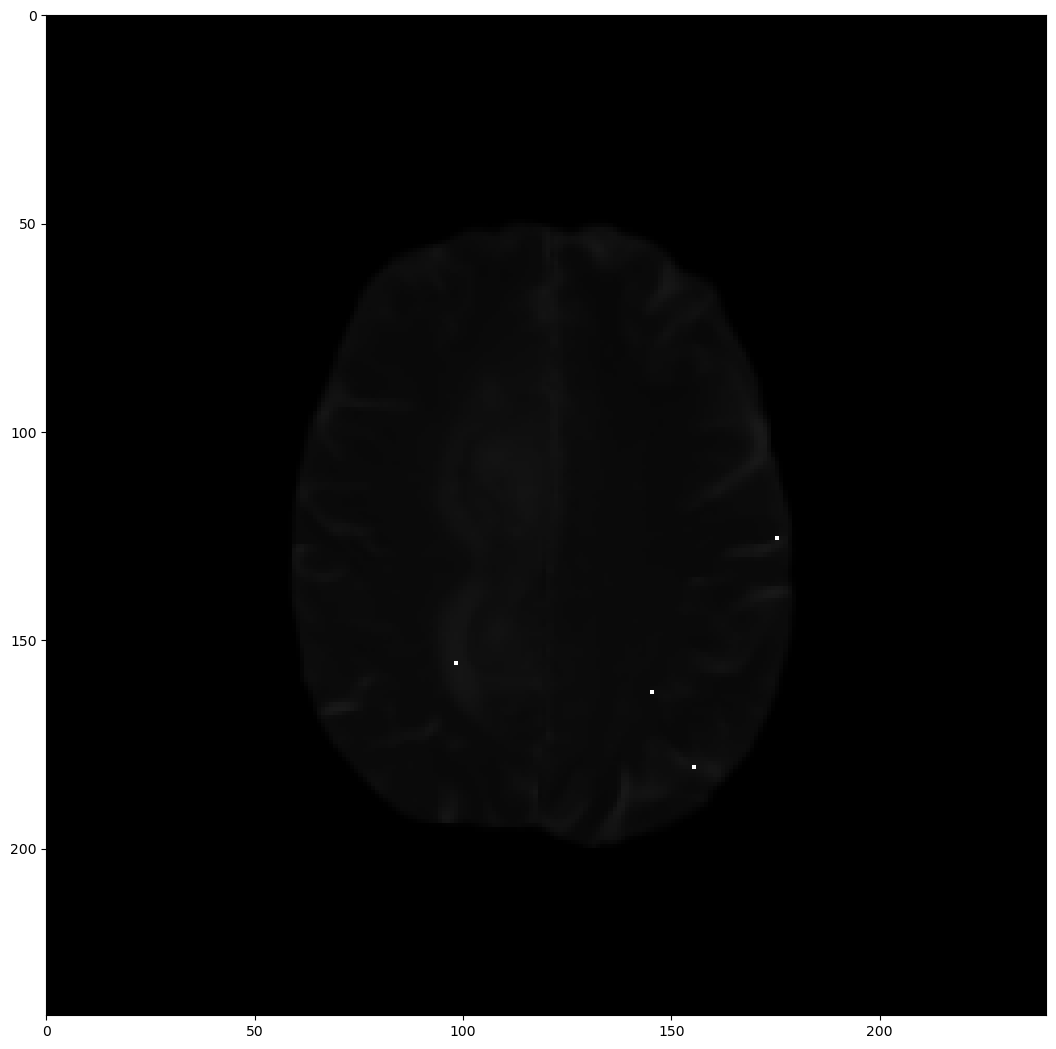

In [47]:
lstSeeds = [(145, 162, idxSlice),
            (98, 155, idxSlice),
            (175, 125, idxSlice),
            (155, 180, idxSlice)]

imgSeeds = SimpleITK.Image(imgT2Smooth)

for s in lstSeeds:
    imgSeeds[s] = 10000

sitk_show(imgSeeds[:, :, idxSlice])

LGG


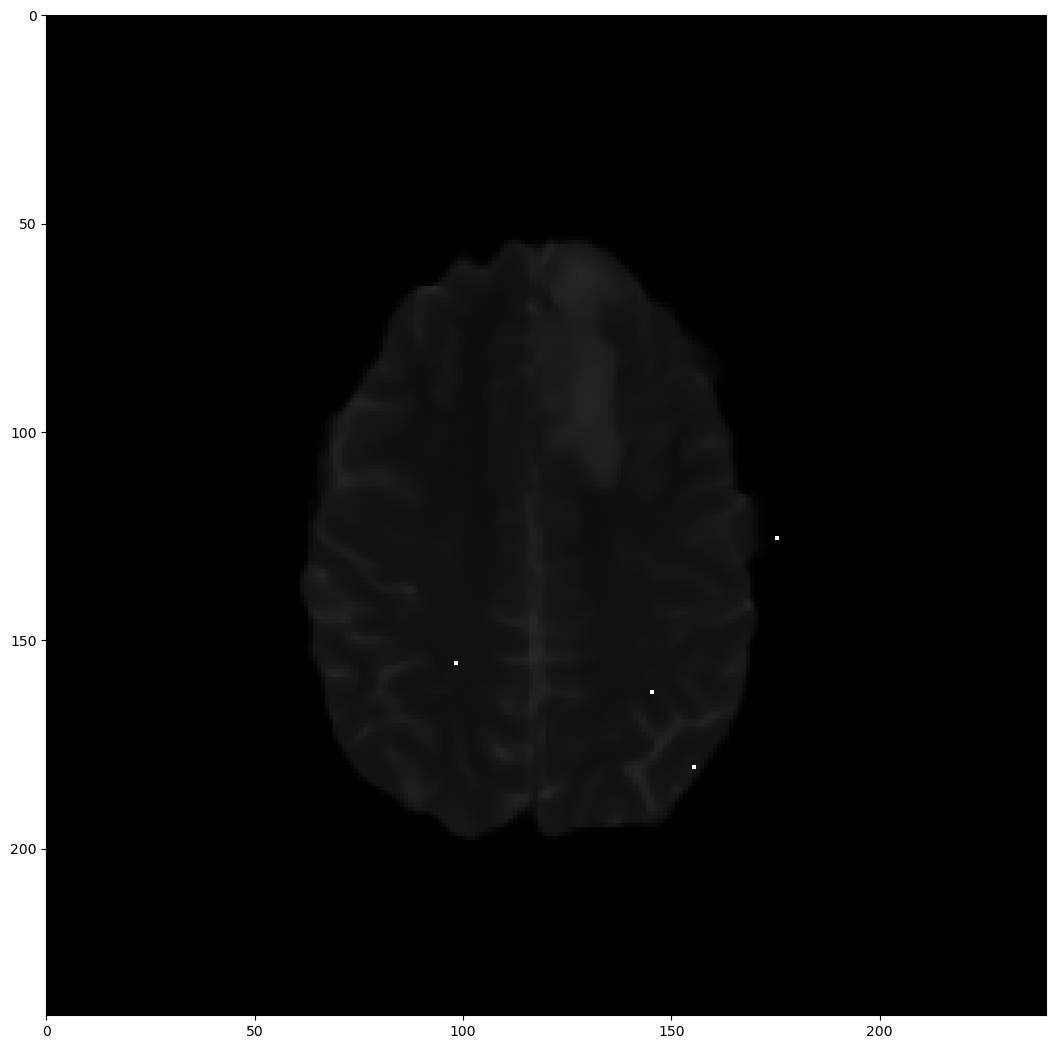

In [48]:
print("LGG")
lstSeeds = [(145, 162, idxSlice),
            (98, 155, idxSlice),
            (175, 125, idxSlice),
            (155, 180, idxSlice)]

imgSeeds = SimpleITK.Image(imgLT2Smooth)

for s in lstSeeds:
    imgSeeds[s] = 10000

sitk_show(imgSeeds[:, :, idxSlice])



In [49]:
def sitk_tile_vec(lstImgs):
    lstImgToCompose = []
    for idxComp in range(lstImgs[0].GetNumberOfComponentsPerPixel()):
        lstImgToTile = []
        for img in lstImgs:
            lstImgToTile.append(SimpleITK.VectorIndexSelectionCast(img, idxComp))
        lstImgToCompose.append(SimpleITK.Tile(lstImgToTile, (len(lstImgs), 0, 0)))
    sitk_show(SimpleITK.Compose(lstImgToCompose))

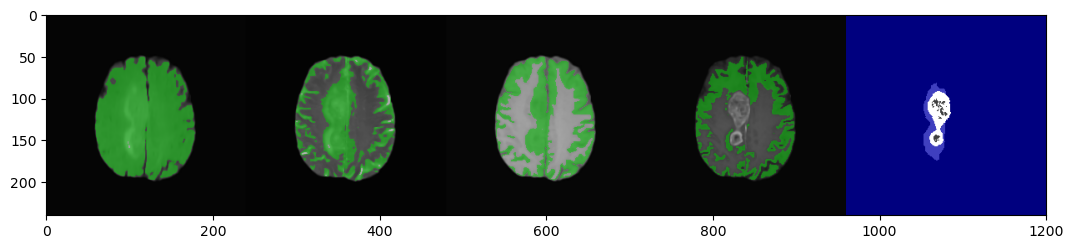

In [50]:
imgGrayMatterF = SimpleITK.ConfidenceConnected(image1=imgFSmooth, 
                                                seedList=lstSeeds,
                                                numberOfIterations=3,
                                                multiplier=0.2,
                                                replaceValue=labelGrayMatter)

imgGrayMatterT2 = SimpleITK.ConfidenceConnected(image1=imgT2Smooth, 
                                                seedList=lstSeeds,
                                                numberOfIterations=10,
                                                multiplier=0.2,
                                                replaceValue=labelGrayMatter)
imgGrayMatterT1 = SimpleITK.ConfidenceConnected(image1=imgT1Smooth, 
                                                seedList=lstSeeds,
                                                numberOfIterations=3,
                                                multiplier=0.2,
                                                replaceValue=labelGrayMatter)

imgGrayMatterTC = SimpleITK.ConfidenceConnected(image1=imgTCSmooth, 
                                                seedList=lstSeeds,
                                                numberOfIterations=3,
                                                multiplier=0.2,
                                                replaceValue=labelGrayMatter)

imgGrayMatterLabel = SimpleITK.ConfidenceConnected(image1=labelOrignal, 
                                                seedList=lstSeeds,
                                                numberOfIterations=3,
                                                multiplier=0.2,
                                                replaceValue=2)


imgFSmoothInt = SimpleITK.Cast(SimpleITK.RescaleIntensity(imgFSmooth), 
                                imgGrayMatterF.GetPixelID())
imgT2SmoothInt = SimpleITK.Cast(SimpleITK.RescaleIntensity(imgT2Smooth), 
                                imgGrayMatterT2.GetPixelID())
imgT1SmoothInt = SimpleITK.Cast(SimpleITK.RescaleIntensity(imgT1Smooth), 
                                imgGrayMatterT1.GetPixelID())
imgTCSmoothInt = SimpleITK.Cast(SimpleITK.RescaleIntensity(imgTCSmooth), 
                                imgGrayMatterTC.GetPixelID())
imgLabelInt = SimpleITK.Cast(SimpleITK.RescaleIntensity(labelOrignal), 
                                imgGrayMatterLabel.GetPixelID())

sitk_tile_vec([SimpleITK.LabelOverlay(imgFSmoothInt[:,:,idxSlice], 
                                      imgGrayMatterF[:,:,idxSlice]),
               SimpleITK.LabelOverlay(imgT2SmoothInt[:,:,idxSlice], 
                                     imgGrayMatterT2[:,:,idxSlice]),
              SimpleITK.LabelOverlay(imgT1SmoothInt[:,:,idxSlice], 
                                     imgGrayMatterT1[:,:,idxSlice]),
              SimpleITK.LabelOverlay(imgTCSmoothInt[:,:,idxSlice], 
                                     imgGrayMatterTC[:,:,idxSlice]),
              SimpleITK.LabelOverlay(imgLabelInt[:,:,idxSlice], 
                                     imgGrayMatterLabel[:,:,idxSlice])])





LGG


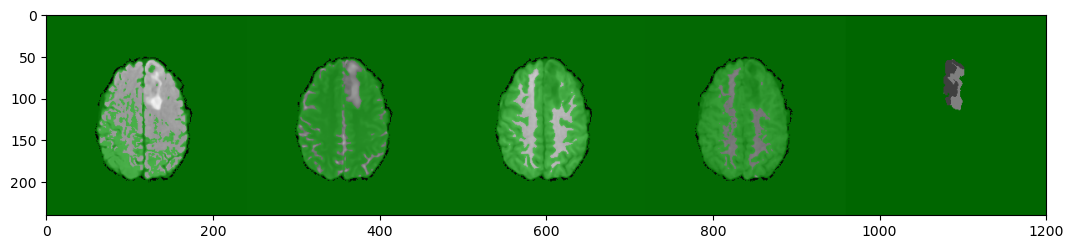

In [52]:
print("LGG")
imgGrayMatterLF = SimpleITK.ConfidenceConnected(image1=imgLFSmooth, 
                                                seedList=lstSeeds,
                                                numberOfIterations=3,
                                                multiplier=0.01,
                                                replaceValue=labelGrayMatter)

imgGrayMatterLT2 = SimpleITK.ConfidenceConnected(image1=imgLT2Smooth, 
                                                seedList=lstSeeds,
                                                numberOfIterations=3,
                                                multiplier=0.01,
                                                replaceValue=labelGrayMatter)
imgGrayMatterLT1 = SimpleITK.ConfidenceConnected(image1=imgLT1Smooth, 
                                                seedList=lstSeeds,
                                                numberOfIterations=3,
                                                multiplier=0.01,
                                                replaceValue=labelGrayMatter)

imgGrayMatterLTC = SimpleITK.ConfidenceConnected(image1=imgLTCSmooth, 
                                                seedList=lstSeeds,
                                                numberOfIterations=3,
                                                multiplier=0.01,
                                                replaceValue=labelGrayMatter)

imgGrayMatterLabelL = SimpleITK.ConfidenceConnected(image1=labelLOrignal, 
                                                seedList=lstSeeds,
                                                numberOfIterations=3,
                                                multiplier=0.2,
                                                replaceValue=labelGrayMatter)

imgLFSmoothInt = SimpleITK.Cast(SimpleITK.RescaleIntensity(imgLFSmooth), 
                                imgGrayMatterF.GetPixelID())
imgLT2SmoothInt = SimpleITK.Cast(SimpleITK.RescaleIntensity(imgLT2Smooth), 
                                imgGrayMatterT2.GetPixelID())
imgLT1SmoothInt = SimpleITK.Cast(SimpleITK.RescaleIntensity(imgLT1Smooth), 
                                imgGrayMatterT1.GetPixelID())
imgLTCSmoothInt = SimpleITK.Cast(SimpleITK.RescaleIntensity(imgLTCSmooth), 
                                imgGrayMatterTC.GetPixelID())
imgLabelLInt = SimpleITK.Cast(SimpleITK.RescaleIntensity(labelLOrignal), 
                                imgGrayMatterLabelL.GetPixelID())

sitk_tile_vec([SimpleITK.LabelOverlay(imgLFSmoothInt[:,:,idxSlice], 
                                      imgGrayMatterLF[:,:,idxSlice]),
               SimpleITK.LabelOverlay(imgLT2SmoothInt[:,:,idxSlice], 
                                     imgGrayMatterLT2[:,:,idxSlice]),
              SimpleITK.LabelOverlay(imgLT1SmoothInt[:,:,idxSlice], 
                                     imgGrayMatterLT1[:,:,idxSlice]),
              SimpleITK.LabelOverlay(imgLTCSmoothInt[:,:,idxSlice], 
                                     imgGrayMatterLTC[:,:,idxSlice]),
               SimpleITK.LabelOverlay(imgLabelLInt[:,:,105], 
                                     imgGrayMatterLabelL[:,:,105])])

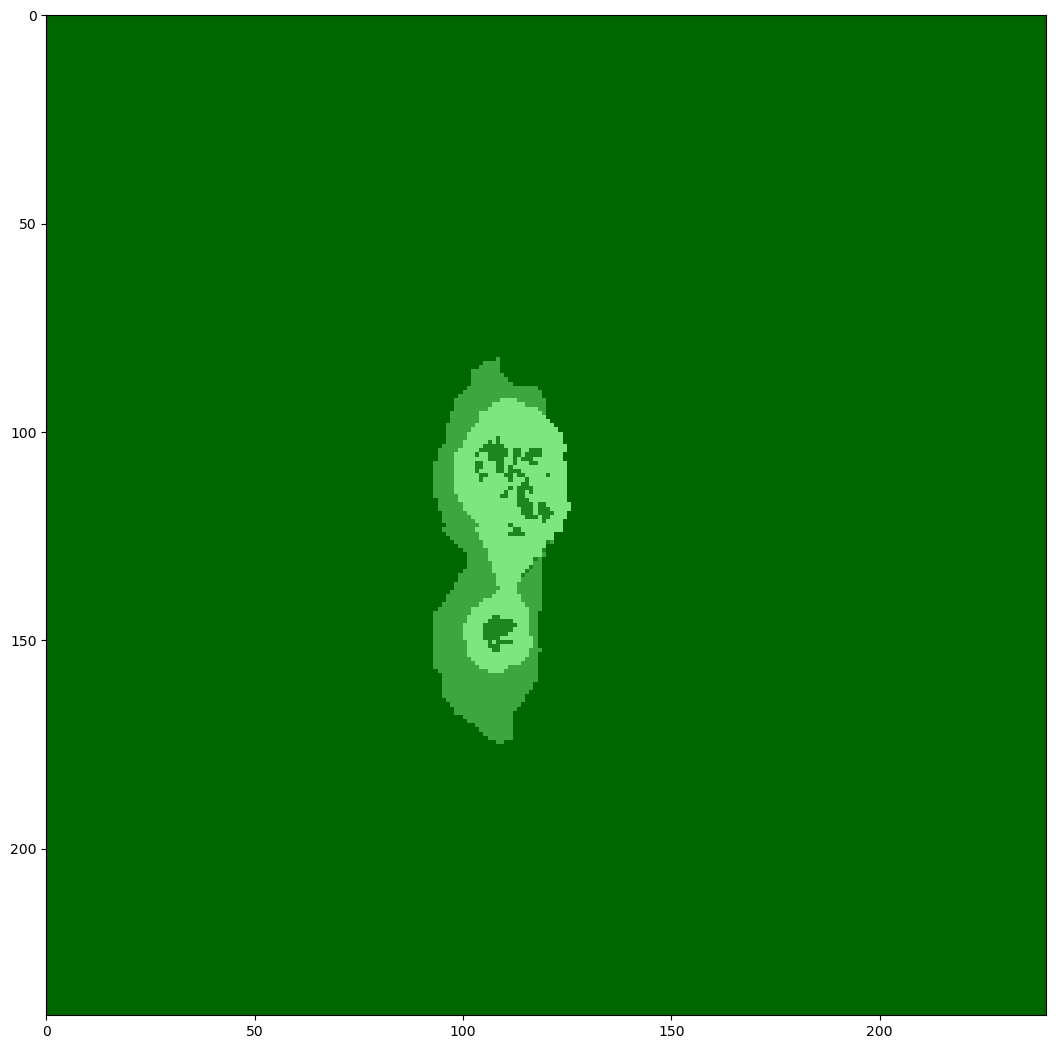

In [53]:
imgComp = SimpleITK.Compose(imgFSmooth, imgT2Smooth,imgT1Smooth,imgTCSmooth)

imgGrayMatterComp = SimpleITK.VectorConfidenceConnected(image1=imgComp, 
                                               seedList=lstSeeds,
                                               numberOfIterations=1,
                                               multiplier=0.1,
                                               replaceValue=labelGrayMatter)

sitk_show(SimpleITK.LabelOverlay(imgLabelInt[:,:,idxSlice], 
                                 imgGrayMatterComp[:,:,idxSlice]))



LGG


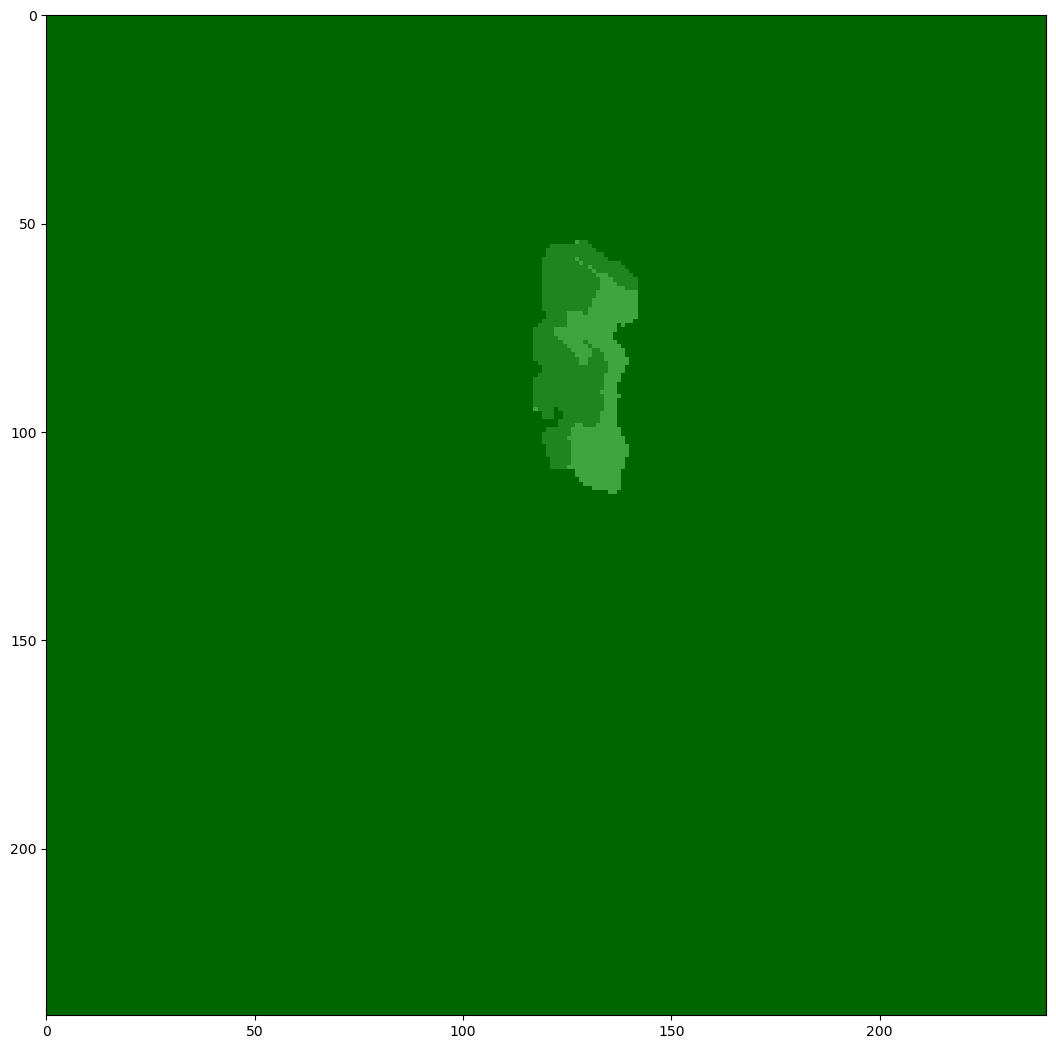

In [55]:
print("LGG")
imgComp = SimpleITK.Compose(imgLFSmooth, imgLT2Smooth,imgLT1Smooth,imgLTCSmooth)

LimgGrayMatterComp = SimpleITK.VectorConfidenceConnected(image1=imgComp, 
                                               seedList=lstSeeds,
                                               numberOfIterations=1,
                                               multiplier=0.1,
                                               replaceValue=labelGrayMatter)

sitk_show(SimpleITK.LabelOverlay(imgLabelLInt[:,:,idxSlice], 
                                 LimgGrayMatterComp[:,:,idxSlice]))

In [56]:
SimpleITK.WriteImage(imgGrayMatterComp, "GrayMatterHGG.mhd")
SimpleITK.WriteImage(imgGrayMatterComp, "GrayMatterLGG.mhd")

In [57]:
import nibabel as nib
import numpy as np

def load_nii_image(file_path):
    # Load the NIfTI image
    img = nib.load(file_path)
    # Convert to numpy array
    img_data = img.get_fdata()
    return img_data

def plot_slice(img_data, slice_idx, title):
    plt.figure(figsize=(6, 6))
    plt.imshow(img_data[:, :, slice_idx], cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Load and visualize sample images for a patient in 2020
patient_id_2020 = "BraTS20_Training_001"
modalities = ['flair','seg', 't1', 't1ce', 't2']

for modality in modalities:
    file_path = f"{path}/2020/{patient_id_2020}/{patient_id_2020}_{modality}.nii"
    img_data = load_nii_image(file_path)
    # Plot the middle slice
    slice_idx = img_data.shape[2] // 2
    plot_slice(img_data, slice_idx, f"{patient_id_2020} - {modality}")


FileNotFoundError: No such file or no access: '/Users/ciro/Downloads/MICCAI_BraTS_2019_Data_Training/2020/BraTS20_Training_001/BraTS20_Training_001_flair.nii'

In [59]:
def check_image_shapes(patient_id, year):
    base_path = f"{year}/{patient_id}"
   # if year in ["2018", "2019"]:
    #    base_path = f"{year}/{'HGG'}/{patient_id}"
    base_path=path+'/'+base_path
    modalities = ['flair', 't1', 't1ce', 't2']
    shapes = {}
    
    for modality in modalities:
        file_path = f"{base_path}/{patient_id}_{modality}.nii"
        
        if os.path.exists(file_path):
             
            img_data = load_nii_image(file_path)
            shapes[modality] = img_data.shape
    
    return shapes

 
patient_id_2019 = "BraTS19_2013_2_1"
shapes_2019 = check_image_shapes(patient_id_2019, "HGG")
print(f"Image shapes for {patient_id_2019} in 2019: {shapes_2019}")
 

Image shapes for BraTS19_2013_2_1 in 2019: {'flair': (240, 240, 155), 't1': (240, 240, 155), 't1ce': (240, 240, 155), 't2': (240, 240, 155)}
